In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA

Find with accuracy less than $\varepsilon = 10^{-3}$ the interception point of curves:
$$\tan (xy + 0.4) = x^2$$
$$0.6 x^2 + 2 y^2 = 1$$

We can see that if (x, y) - the interception point so then (-x, -y). So I'm gonna find points only in the first and second quadrants. I will use Newton's method for system of nonlinear equations.
$$f_1(x, y) = \tan (xy + 0.4) - x^2 = 0$$ 
$$f_2(x, y) = 0.6 x^2 + 2 y^2 - 1 = 0$$ \\
$$\frac{\partial{f_1}}{\partial{x}} = \frac{y}{\cos^2 (xy+0.4)} - 2x$$ \\
$$\frac{\partial{f_1}}{\partial{y}} = \frac{x}{\cos^2 (xy+0.4)}$$ \\
$$\frac{\partial{f_2}}{\partial{x}} = 1.2x $$ \\
$$\frac{\partial{f_2}}{\partial{y}} = 4y$$ \\

In [18]:
# y = F1(x) from the first equation 
def F1(x):
    return (math.atan(x*x) - 0.4)/x

In [19]:
# y = F2(x) from the second equation (should mind about sign)
def F2(x):
    return math.sqrt((1-0.6*x*x)/2.0)

In [20]:
def f2(x, y):
    return 0.6*(x**2) + 2*(y**2) - 1

In [21]:
def f1(x, y):
    return math.tan(x*y + 0.4) - x**2

In [22]:
def Jacobi(x, y):
    X = np.zeros((2, 2), dtype = float)
    X[0][0] = y/(math.pow(math.cos(x*y+0.4), 2)) - 2*x
    X[0][1] = x/(math.pow(math.cos(x*y+0.4), 2))
    X[1][0] = 1.2*x
    X[1][1] = 4.0*y
    return X

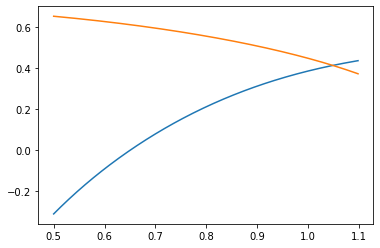

In [23]:
# First quadrant, rough
N = 300
X = np.zeros(N, dtype = float)
Y = np.zeros(N, dtype = float)
Z = np.zeros(N, dtype = float)
for i in range (N):
    X[i] = (250.0+i)/500.0 
    Y[i] = F1(X[i])
    Z[i] = F2(X[i])
fig = plt.figure()
plt.plot(X,Y)
plt.plot(X,Z)
plt.show()

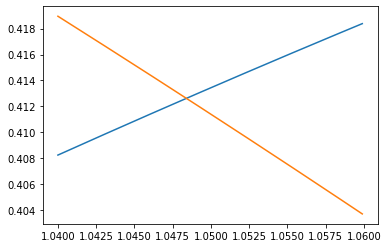

In [24]:
# First quadrant
N = 200
X = np.zeros(N, dtype = float)
Y = np.zeros(N, dtype = float)
Z = np.zeros(N, dtype = float)
for i in range (N):
    X[i] = (10400.0 + i)/10000.0 
    Y[i] = F1(X[i])
    Z[i] = F2(X[i])
fig = plt.figure()
plt.plot(X,Y)
plt.plot(X,Z)
plt.show()

In [53]:
# First quadrant, solution
N = 6
x_0 = 1.0500
y_0 = 0.412
Sol = np.zeros(2)
Sol[0] = x_0
Sol[1] = y_0
Fsol = np.zeros(2)

for i in range(N):
    Y = LA.inv(Jacobi(Sol[0], Sol[1]))
    Fsol[0] = f1(Sol[0], Sol[1])
    Fsol[1] = f2(Sol[0], Sol[1])
    print('Substitute approximation into system', Fsol)
    Sol = Sol - Y@Fsol
    print(Sol)

Substitute approximation into system [-0.00334225  0.000988  ]
[1.04840284 0.41262161]
Substitute approximation into system [-4.74308549e-06  2.30334799e-06]
[1.04840014 0.41262228]
Substitute approximation into system [-1.08457687e-11  5.26578781e-12]
[1.04840014 0.41262228]
Substitute approximation into system [2.22044605e-16 0.00000000e+00]
[1.04840014 0.41262228]
Substitute approximation into system [ 2.22044605e-16 -2.22044605e-16]
[1.04840014 0.41262228]
Substitute approximation into system [-2.22044605e-16  2.22044605e-16]
[1.04840014 0.41262228]


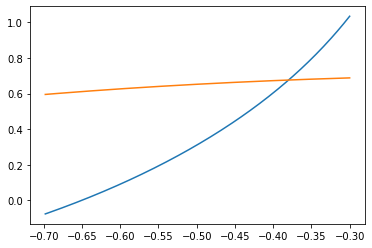

In [26]:
#Second quadrant, rough
N = 200
X = np.zeros(N, dtype = float)
Y = np.zeros(N, dtype = float)
Z = np.zeros(N, dtype = float)
for i in range (N):
    X[i] = -(150.0+i)/500.0 
    Y[i] = F1(X[i])
    Z[i] = F2(X[i])
fig = plt.figure()
plt.plot(X,Y)
plt.plot(X,Z)
plt.show()

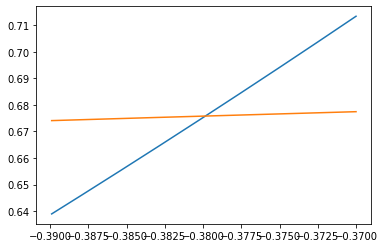

In [27]:
#Second quadrant
N = 200
X = np.zeros(N, dtype = float)
Y = np.zeros(N, dtype = float)
Z = np.zeros(N, dtype = float)
for i in range (N):
    X[i] = -(3700.0+i)/10000.0 
    Y[i] = F1(X[i])
    Z[i] = F2(X[i])
fig = plt.figure()
plt.plot(X,Y)
plt.plot(X,Z)
plt.show()

In [52]:
#Second quadrant, solution
N = 5
x_0 = -0.38
y_0 = 0.675
Sol = np.zeros(2)
Sol[0] = x_0
Sol[1] = y_0
Fsol = np.zeros(2)

for i in range(N):
    Y = LA.inv(Jacobi(Sol[0], Sol[1]))
    Fsol[0] = f1(Sol[0], Sol[1])
    Fsol[1] = f2(Sol[0], Sol[1])
    print('Substitute approximation into system', Fsol)
    Sol = Sol - Y@Fsol
    print(Sol)

Substitute approximation into system [ 9.31774647e-05 -2.11000000e-03]
[-0.37984823  0.67580711]
Substitute approximation into system [1.08163042e-07 1.31668588e-06]
[-0.37984844  0.67580659]
Substitute approximation into system [6.89726054e-14 5.75317571e-13]
[-0.37984844  0.67580659]
Substitute approximation into system [-2.77555756e-17  0.00000000e+00]
[-0.37984844  0.67580659]
Substitute approximation into system [-2.77555756e-17  0.00000000e+00]
[-0.37984844  0.67580659]
